# Monte Carlo Simulation for FE
## IEOR 4703

### Implementation of a delta-hedging strategy for a call option

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

# import our BMS price and delta functions
from BMS import BMS_price, BMS_delta

In [2]:
spot = 100
K = 90
r = 0.0
q = 0.20
sig = 0.40

maturity = 1

m = 365
dt = maturity/m

n_sim = 400

### Compute the true value of the call

In [3]:
C = BMS_price('call', spot, K, r, q, sig, maturity)
print('C = ' + str(C))

C = 9.933286369537992


### Delta-hedging strategy -- with zero risk-free rate (r=0) & zero dividend rate (q=0)

In [4]:
np.random.seed(675854366)

In [5]:
synthetic_C = np.zeros(n_sim)

st = time()

for j in range(n_sim):

    # reset for each path
    S = spot
    T = maturity
    delta_C_prev = 0.0

    for i in range(m):


        delta_C = BMS_delta('call', S, K, r, q, sig, T)

        synthetic_C[j] += (delta_C*np.exp(q*i*dt)  - delta_C_prev)*S*np.exp(-r*i*dt)

        # Note - net position is always delta_c
        delta_C_prev = delta_C

        z = np.random.randn()
        S = S * np.exp((r - q - sig*sig/2)*dt + sig*np.sqrt(dt)*z)


        T = T - dt

    synthetic_C[j] += np.exp(-r*maturity)*(-delta_C*S+ np.maximum(S-K,0))
    #synthetic_C[j] += (-delta_C*S + np.maximum(S-K,0))

et = time()
print('Elapsed time is %s seconds.' % str(et - st))

Elapsed time is 18.323867321014404 seconds.


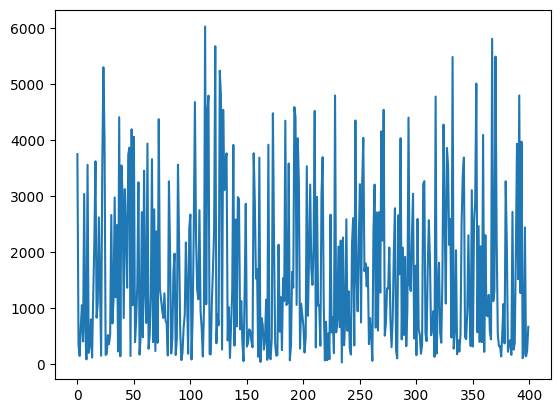

In [6]:
plt.plot(synthetic_C)
plt.show()

In [7]:
print('C = ' + str(C))
print('mean_synthetic_C = ' + str(np.mean(synthetic_C)))
print('std_synthetic_C = ' + str(np.std(synthetic_C, ddof=1)))

C = 9.933286369537992
mean_synthetic_C = 1609.6154275831755
std_synthetic_C = 1433.0636248674232
